In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# if using a Jupyter notebook, includue:
%matplotlib inline
from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score

In [8]:
def read_dataset(filePath,delimiter=','):
    return genfromtxt(filePath, delimiter=delimiter)

def feature_normalize(dataset):
    mu = np.mean(dataset,axis=0)
    sigma = np.std(dataset,axis=0)
    return (dataset - mu)/sigma

def estimateGaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.std(dataset,axis=0)
    return mu, sigma
    
def multivariateGaussian(dataset,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

def selectThreshold(mu,sigma):
    threshold = mu+30*sigma
    return threshold

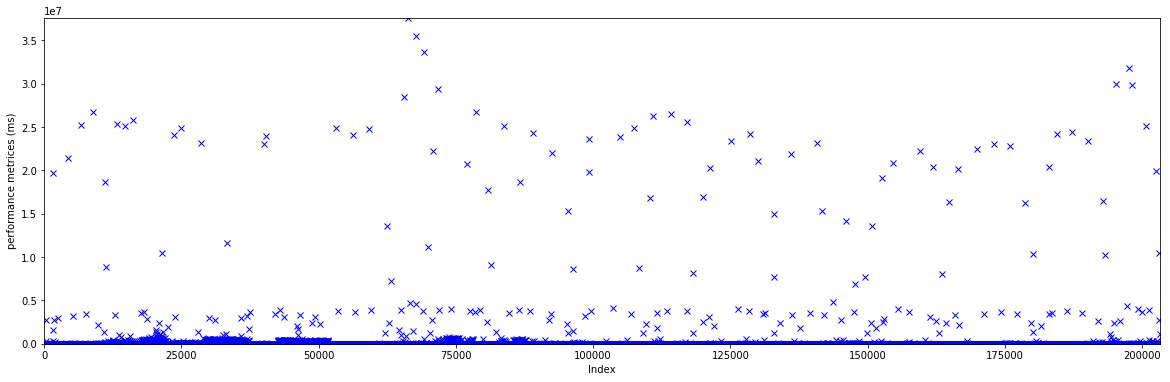

In [18]:
tr_data = read_dataset('statements_new.csv')
n_training_samples = tr_data.shape[0]
n_dim = tr_data.shape[1]
plt.figure()
plt.axis([np.min(tr_data[:,0]), np.max(tr_data[:,0]), np.min(tr_data[:,5]), np.max(tr_data[:,5])])
#plt.rcParams["figure.figsize"] = (20,6)
plt.xlabel("Index")
plt.ylabel("performance metrices (ms)")
plt.plot(tr_data[:,0],(tr_data[:,5]),"bx")
#plt.plot(tr_data[:,0],(tr_data[:,7]),"rx")
#plt.plot(tr_data[:,0],(tr_data[:,9]),"gx")
plt.show()

MU= 7085.923716814159
SIGMA= 1259.7770732783904


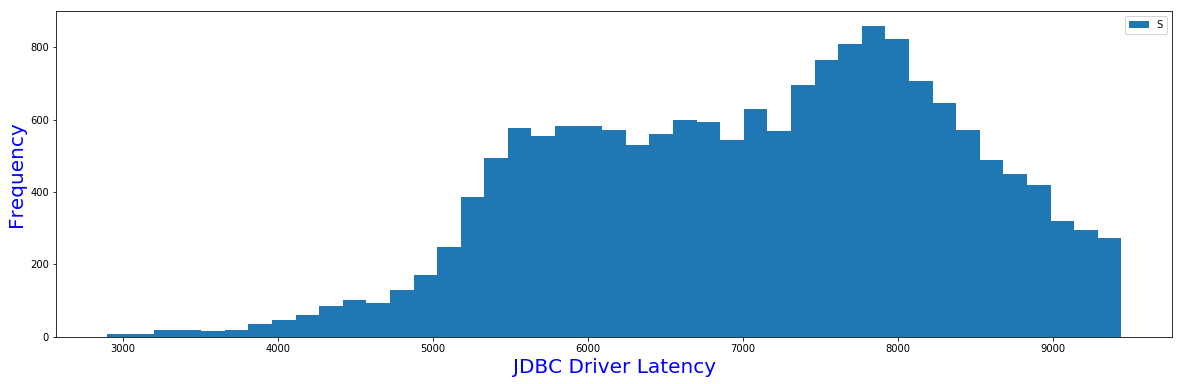

threshold= 44879.235915165875
Number of Anomalies in Driver= 897
List Of Anomalies= [  293773.  2716746.    52165. 19662956.  1605070.  2749413.   203302.
  3013406. 21379086.  3150895. 25253163.  3459754. 26728063.  2160004.
  1334456. 18664156.   241563.  8870781.   267886.    78769.   231844.
   205459.   258445.   241373.   429582.   266578.   286048.   290271.
   239291.  3318738. 25300428.   192061.  1020847.   248977.   239965.
   262364.   745496.   481570. 25062579.   157680.   210330.   442885.
   145869.   215228.   943894.   303099. 25809109.   269246.   287717.
   287373.  3567918.   397990.   440429.   292995.   406216.   225175.
   406864.   427650.   255548.   310566.  3678739.   593741.   490720.
   358430.   349858.   276132.   406306.   603508.   378759.  2821277.
   304152.   384405.   469599.   428686.   477989.   357381.   321081.
   571467.   435716.   619777.   400967.   479586.   382479.   405509.
   346112.   730379.   425570.   427258.   385484.   442463.   4

In [17]:
tr_data = read_dataset('statements_new.csv')
#print(tr_data[:,5])
tr_data=tr_data[tr_data[:,17]==0]
tr_tmp=tr_data[tr_data[:,5] < np.percentile(tr_data[:,5],80)]
test=np.amax(tr_data[:,5])
#print("max=",test)
mu, sigma = estimateGaussian(tr_tmp[:,5])
print("MU=",mu)
print("SIGMA=",sigma)

plt.hist(tr_tmp[:,5],bins='auto')
plt.xlabel('JDBC Driver Latency', fontsize=20,color='blue')
plt.ylabel('Frequency',fontsize=20,color='blue')
plt.legend('SELECT QUERY')
#plt.rcParams["figure.figsize"] = (20,6)
plt.show()

threshold=selectThreshold(mu,sigma)
print('threshold=',threshold)
tr_anomaly=tr_data[tr_data[:,5] > threshold]
n_dim = tr_anomaly.shape[0]
print('Number of Anomalies in Driver=',n_dim)
print('List Of Anomalies=',tr_anomaly[:,5])

6450.98080927458
1244.4916809034594


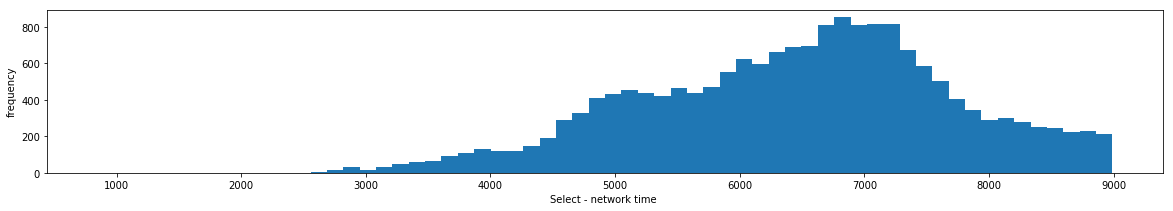

threshold= 10184.455851984958
3210
[ 494958.  236161.   19790. ...  943336.   10329. 7325660.]


In [143]:
tr_data = read_dataset('statements.csv')
#print(tr_data[:,7])
tr_data=tr_data[tr_data[:,17]==0]
tr_tmp=tr_data[tr_data[:,7] < np.percentile(tr_data[:,7],80)]
mu, sigma = estimateGaussian(tr_tmp[:,7])
print(mu)
print(sigma)
plt.hist(tr_tmp[:,7],bins='auto')
plt.xlabel('Select - network time ')
plt.ylabel('frequency')
plt.show()
threshold=selectThreshold(mu,sigma)
print('threshold=',threshold)
tr_anomaly=tr_data[tr_data[:,7] > threshold]
n_dim = tr_anomaly.shape[0]
print(n_dim)
print(tr_anomaly[:,7])

mu= 1039.3409525954285
sigma= 299.7449964516842


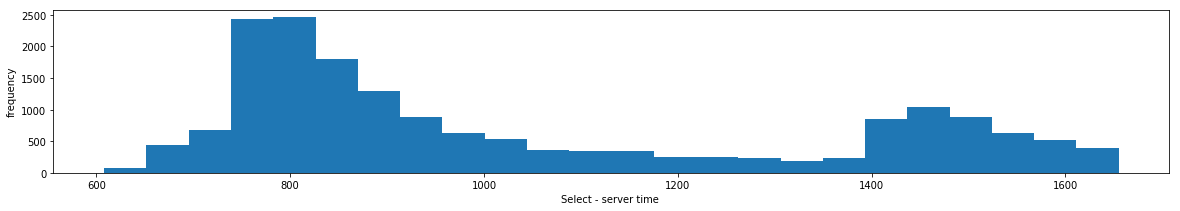

threshold= 1938.5759419504811
3381
[4.877820e+05 2.307960e+05 2.196000e+03 ... 2.394900e+05 7.995830e+05
 7.152227e+06]


In [142]:
tr_data = read_dataset('statements.csv')
#print(tr_data[:,9])
tr_data=tr_data[tr_data[:,17]==0]
tr_tmp=tr_data[tr_data[:,9] < np.percentile(tr_data[:,9],80)]
mu, sigma = estimateGaussian(tr_tmp[:,9])
print("mu=",mu)
print("sigma=",sigma)
plt.hist(tr_tmp[:,9],bins='auto')
plt.xlabel('Select - server time ')
plt.ylabel('frequency')
plt.show()
threshold=selectThreshold(mu,sigma)gm
print('threshold=',threshold)
tr_anomaly=tr_data[tr_data[:,9] > threshold]
n_dim = tr_anomaly.shape[0]
print(n_dim)
print(tr_anomaly[:,9])

mu= 908183.4004739337
sigma= 311967.4522736576


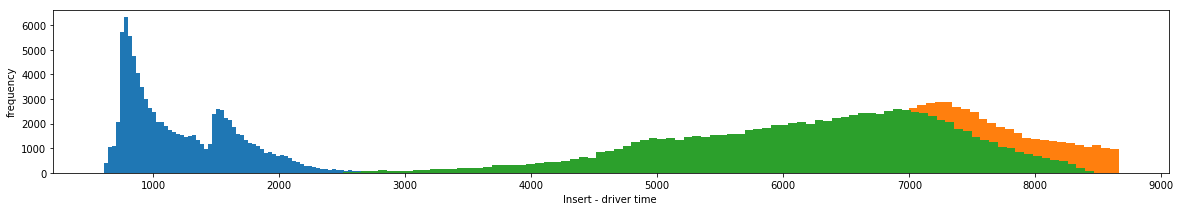

threshold= 2779988.1141158794
0
[]


In [122]:
tr_data = read_dataset('statements.csv')
#print(tr_data[:,5])
tr_data=tr_data[tr_data[:,17]==32]
tr_tmp=tr_data[tr_data[:,5] < np.percentile(tr_data[:,5],80)]
mu, sigma = estimateGaussian(test_data[:,5])
print("mu=",mu)
print("sigma=",sigma)
plt.hist(tr_tmp[:,9],bins='auto')
plt.hist(tr_tmp[:,5],bins='auto')
plt.hist(tr_tmp[:,7],bins='auto')
plt.xlabel('Insert - driver time ')
plt.ylabel('frequency')
plt.show()
threshold=selectThreshold(mu,sigma)
print('threshold=',threshold)
tr_anomaly=tr_data[tr_data[:,5] > threshold]
n_dim = tr_anomaly.shape[0]
print(n_dim)
print(tr_anomaly[:,5])

mu= 906512.490521327
sigma= 311583.99413330003


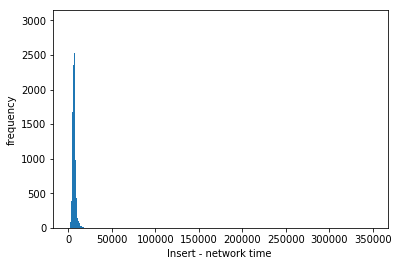

threshold= 2776016.455321127
0
[]


In [114]:
tr_data = read_dataset('statements.csv')
#print(tr_data[:,7])
tr_data=tr_data[tr_data[:,17]==32]
tr_tmp=tr_data[tr_data[:,7] < np.percentile(tr_data[:,7],80)]
mu, sigma = estimateGaussian(test_data[:,7])
print("mu=",mu)
print("sigma=",sigma)
plt.hist(tr_data[:,7],bins='auto')
plt.xlabel('Insert - network time ')
plt.ylabel('frequency')
plt.show()
threshold=selectThreshold(mu,sigma)
print('threshold=',threshold)
tr_anomaly=tr_data[tr_data[:,7] > threshold]
n_dim = tr_anomaly.shape[0]
print(n_dim)
print(tr_anomaly[:,7])

mu= 308104.5663507109
sigma= 214844.64138688197


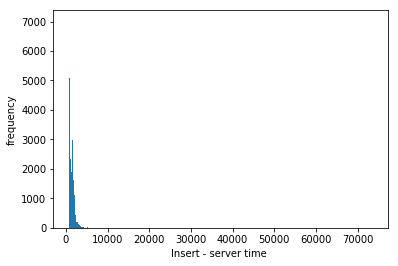

threshold= 1597172.4146720027
0
[]


In [115]:
tr_data = read_dataset('statements.csv')
#print(tr_data[:,9])
tr_data=tr_data[tr_data[:,17]==32]
tr_tmp=tr_data[tr_data[:,9] < np.percentile(tr_data[:,9],80)]
mu, sigma = estimateGaussian(test_data[:,9])
print("mu=",mu)
print("sigma=",sigma)
plt.hist(tr_data[:,9],bins='auto')
plt.xlabel('Insert - server time ')
plt.ylabel('frequency')
plt.show()
threshold=selectThreshold(mu,sigma)
print('threshold=',threshold)
tr_anomaly=tr_data[tr_data[:,9] > threshold]
n_dim = tr_anomaly.shape[0]
print(n_dim)
print(tr_anomaly[:,9])

mu= 908183.4004739337
sigma= 311967.4522736576


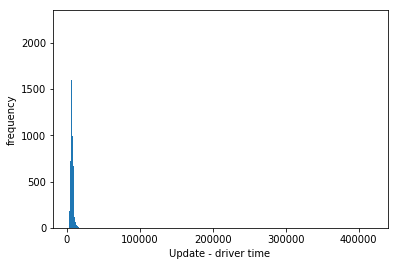

threshold= 2779988.1141158794
0
[]


In [116]:
tr_data = read_dataset('statements.csv')
tr_data=tr_data[tr_data[:,17]==128]
tr_tmp=tr_data[tr_data[:,5] < np.percentile(tr_data[:,5],80)]
mu, sigma = estimateGaussian(test_data[:,5])
print("mu=",mu)
print("sigma=",sigma)
plt.hist(tr_data[:,5],bins='auto')
plt.xlabel('Update - driver time ')
plt.ylabel('frequency')
plt.show()
threshold=selectThreshold(mu,sigma)
print('threshold=',threshold)
tr_anomaly=tr_data[tr_data[:,5] > threshold]
n_dim = tr_anomaly.shape[0]
print(n_dim)
print(tr_anomaly[:,5])

mu= 906512.490521327
sigma= 311583.99413330003


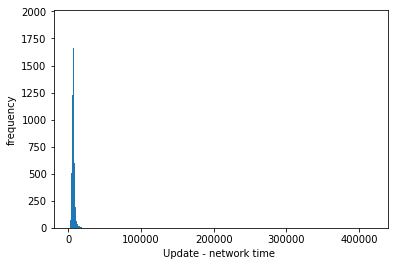

threshold= 2776016.455321127
0
[]


In [117]:
tr_data = read_dataset('statements.csv')
tr_data=tr_data[tr_data[:,17]==128]
tr_tmp=tr_data[tr_data[:,7] < np.percentile(tr_data[:,7],80)]
mu, sigma = estimateGaussian(test_data[:,7])
print("mu=",mu)
print("sigma=",sigma)
plt.hist(tr_data[:,7],bins='auto')
plt.xlabel('Update - network time ')
plt.ylabel('frequency')
plt.show()
threshold=selectThreshold(mu,sigma)
print('threshold=',threshold)
tr_anomaly=tr_data[tr_data[:,7] > threshold]
n_dim = tr_anomaly.shape[0]
print(n_dim)
print(tr_anomaly[:,7])

mu= 1295.7876493528045
sigma= 324.3401741441494


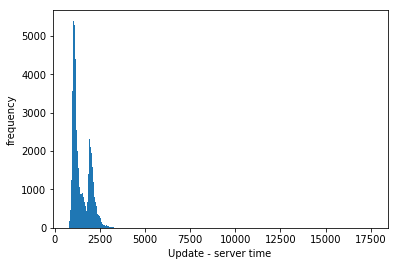

threshold= 3241.828694217701
111
[ 3322.  3307.  3709.  3421.  3645.  3644.  3495.  3337.  3336.  6164.
  3482.  3357.  3745.  3537.  3258.  3907.  3299.  3458.  3551.  3273.
  3251.  3502.  3679.  3435.  3540. 11664.  3401.  3552.  3395.  3536.
  3400.  3340.  7047.  3502.  3423.  3576.  5672.  5160.  6030.  3584.
  6168.  3360.  7074.  4746.  4238.  4003.  3658.  3254.  3670.  7206.
 11233.  3350.  7024.  3786.  3774.  6421.  3589.  4790.  5688.  3328.
  7022.  3389.  4296.  4031.  3551.  3359.  3712.  3304.  5047.  3349.
  6431.  3334.  5771.  4072.  5266.  3362.  3765.  7850.  7307.  7360.
  5050.  6495.  3347.  7067.  5613.  7000.  3802.  3872.  3306.  3258.
  4121.  7261.  5357.  4050.  3536.  3992.  3345.  4034. 17620.  3753.
  6244.  6040.  3243.  5777.  6017.  3307.  7069.  3628. 17618.  3642.
  5881.]
[   nan    nan    nan    nan    nan    inf    nan    nan    nan 1.e+62
 1.e+62 1.e+62    nan    nan    nan    nan 1.e+62    nan 1.e+62    nan
    nan    nan    nan    nan    inf

In [118]:
tr_data = read_dataset('statements.csv')
tr_data=tr_data[tr_data[:,17]==128]
tr_tmp=tr_data[tr_data[:,9] < np.percentile(tr_data[:,9],80)]
mu, sigma = estimateGaussian(tr_tmp[:,9])
print("mu=",mu)
print("sigma=",sigma)
plt.hist(tr_data[:,9],bins='auto')
plt.xlabel('Update - server time ')
plt.ylabel('frequency')
plt.show()
threshold=selectThreshold(mu,sigma)
print('threshold=',threshold)
tr_anomaly=tr_data[tr_data[:,9] > threshold]
n_dim = tr_anomaly.shape[0]
print(n_dim)
print(tr_anomaly[:,9])
print(tr_anomaly[:,0])

mu_driver= 6824.086574160496
sigma_driver= 1146.3031688436306
mu_network= 6331.437448149992
sigma_network= 1096.6801037426121
mu_server= 1295.7876493528045
sigma_server= 324.3401741441494


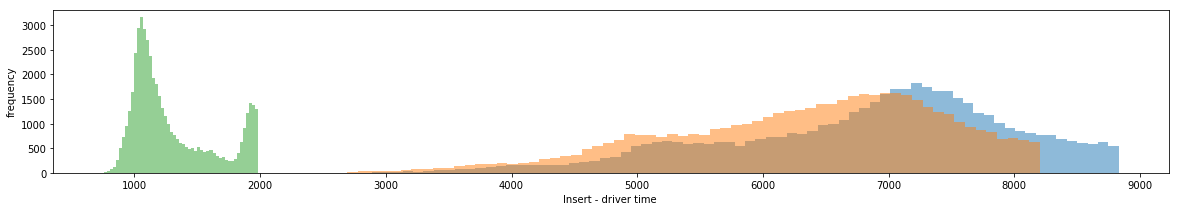

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

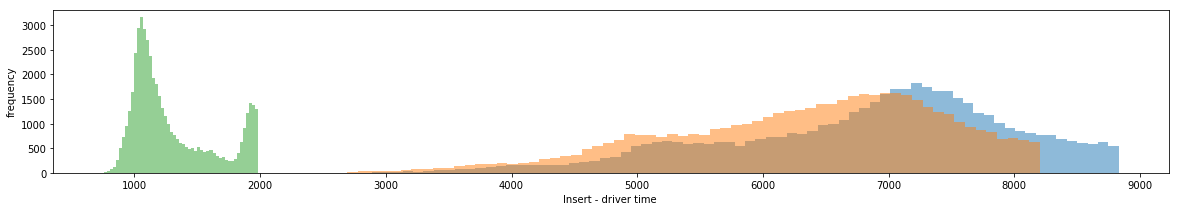

In [177]:
tr_data = read_dataset('statements.csv')
#print(tr_data[:,5])
tr_data=tr_data[tr_data[:,17]==128]
#tr_data[:,5]=tr_data[:,5]/tr_data[:,12]
#tr_data[:,7]=tr_data[:,7]/tr_data[:,12]
#tr_data[:,9]=tr_data[:,9]/tr_data[:,12]
tr_tmp_driver=tr_data[tr_data[:,5] < np.percentile(tr_data[:,5],80)]
tr_tmp_network=tr_data[tr_data[:,7] < np.percentile(tr_data[:,7],80)]
tr_tmp_server=tr_data[tr_data[:,9] < np.percentile(tr_data[:,9],80)]
mu_driver, sigma_driver = estimateGaussian(tr_tmp_driver[:,5])
mu_network, sigma_network = estimateGaussian(tr_tmp_network[:,7])
mu_server, sigma_server = estimateGaussian(tr_tmp_server[:,9])

print("mu_driver=",mu_driver)
print("sigma_driver=",sigma_driver)

print("mu_network=",mu_network)
print("sigma_network=",sigma_network)

print("mu_server=",mu_server)
print("sigma_server=",sigma_server)

plt.hist(tr_tmp_driver[:,5],bins='auto',alpha=0.5)
plt.hist(tr_tmp_network[:,7],bins='auto',alpha=0.5)
plt.hist(tr_tmp_server[:,9],bins='auto',alpha=0.5)
plt.xlabel('Insert - driver time ')
plt.ylabel('frequency')
plt.show(tr_tmp_network[:,7],tr_tmp_driver[:,5])
plt.plot(xs, ys)
threshold_driver=selectThreshold(mu_driver,sigma_driver)
threshold_network=selectThreshold(mu_network,sigma_network)
threshold_server=selectThreshold(mu_server,sigma_server)
print('threshold=',threshold)
tr_anomaly_driver=tr_data[tr_data[:,5] > threshold_driver]
tr_anomaly_network=tr_data[tr_data[:,7] > threshold_network]
tr_anomaly_server=tr_data[tr_data[:,6] > threshold_server]
n_dim = tr_anomaly.shape[0]
print(n_dim)
print(tr_anomaly_driver[:,5])
print(tr_anomaly_network[:,7])
print(tr_anomaly_server[:,9])

Mean = 6682.071154484361
SIGMA= 1145.1048225111897


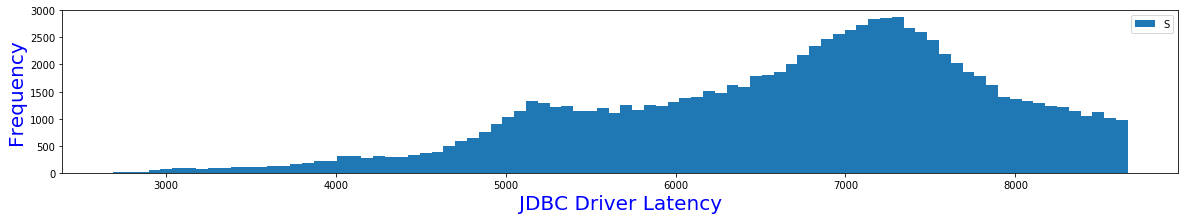

Adaptive Threshold= 41035.21582982005
Number of Total Db2 Performance Record= 120554
Number of Anomalies in Driver= 61
List Of Anomalies= [ 79003.  46999. 129157. 118029. 124725. 125163. 118289.  51620.  41649.
 309768. 350654.  80892. 121765. 122513. 123001.  46719. 128978. 142800.
 122145. 302986. 310322.  78368. 305929.  49885. 319569.  52559. 132641.
  54967. 120127. 110088.  63554. 302956.  41360. 123594. 121115. 130942.
 124040. 136845.  91050.  48739.  52816.  41906. 304900.  44156.  64894.
  96432. 118674.  68078. 120520.  55797. 140435. 306558.  45628.  45646.
  52063.  41856. 123122.  87406. 120252. 124971.  50820.]


In [176]:
tr_data = read_dataset('statements.csv')
#print(tr_data[:,5])
tr_data=tr_data[tr_data[:,17]==32]
tr_data[:,5]=tr_data[:,5]/tr_data[:,12]
n_dim1 = tr_data.shape[0]
tr_tmp=tr_data[tr_data[:,5] < np.percentile(tr_data[:,5],80)]
test=np.amax(tr_data[:,5])
#print("max=",test)
mu, sigma = estimateGaussian(tr_tmp[:,5])
print("Mean =",mu)
print("SIGMA=",sigma)
#mu1, sigma1 = estimateGaussian(tr_data[:,5])
#print("mu1=",mu1)
#print("sigma1=",sigma1)
#threshold1=selectThreshold(mu1,sigma1)
#print('threshold1=',threshold1)
#tr_anomaly1=tr_data[tr_data[:,5] > threshold1]
#n_dim1 = tr_anomaly1.shape[0]
#print(n_dim1)
#print(tr_anomaly1[:,5])

plt.hist(tr_tmp[:,5],bins='auto')
plt.xlabel('JDBC Driver Latency', fontsize=20,color='blue')
plt.ylabel('Frequency',fontsize=20,color='blue')
plt.legend('SELECT QUERY')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

threshold=selectThreshold(mu,sigma)
print('Adaptive Threshold=',threshold)
tr_anomaly=tr_data[tr_data[:,5] > threshold]
n_dim = tr_anomaly.shape[0]
print('Number of Total Db2 Performance Record=',n_dim1)
print('Number of Anomalies in Driver=',n_dim)
print('List Of Anomalies=',tr_anomaly[:,5])